In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
ak_se = pd.read_csv('../datasets/alaska_single_engine.csv')

In [16]:
ak_se.shape

(5659, 39)

In [73]:
ak_se['HighestInjuryLevel'].value_counts()

None       3066
Minor       445
Fatal       418
Serious     274
Name: HighestInjuryLevel, dtype: int64

In [74]:
ak_se['AirCraftDamage'].value_counts()

Substantial                3722
Destroyed                   323
Minor                        64
None                         40
Substantial,Substantial      13
Minor,Substantial             7
Substantial,Destroyed         6
Destroyed,Destroyed           6
None,None                     5
Destroyed,Substantial         3
Substantial,Minor             3
Unknown                       2
Minor,Destroyed               2
None,Substantial              2
Substantial,None              2
Substantial,Unknown           1
Minor,Minor                   1
Name: AirCraftDamage, dtype: int64

In [4]:

pd.set_option('display.max_colwidth', None)

In [5]:
def custom_lemmatize(word, tag):
    mapper = {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV
    }
    pos = mapper.get(tag[0])
    
    return wn.lemmatize(word, pos) if pos else word

In [19]:
ak_se.dropna(subset=['ProbableCause'], inplace = True)

In [20]:
ak_se.shape

(4207, 39)

In [21]:
wn = WordNetLemmatizer()

In [22]:
#av['N'] 
ak_lem = ak_se['ProbableCause'].fillna('None given').apply(lambda cause : ' '.join([custom_lemmatize(word, tag) for word, tag in nltk.pos_tag(cause.split())]))

# reddit_data_df['title'].apply(lambda title : ' '.join([custom_lemmatize(word,tag) for word, tag in nltk.pos_tag(title.split())]))

In [68]:
cvec = CountVectorizer(stop_words='english', ngram_range=(5,5))

In [69]:
ak_cvec = cvec.fit_transform(ak_lem)

In [70]:
ak_cvec.shape

(4207, 35318)

In [71]:
frequent_ngrams = pd.DataFrame(ak_cvec.todense(), columns = cvec.get_feature_names_out()).sum().sort_values( ascending = False).head(50)

<Axes: >

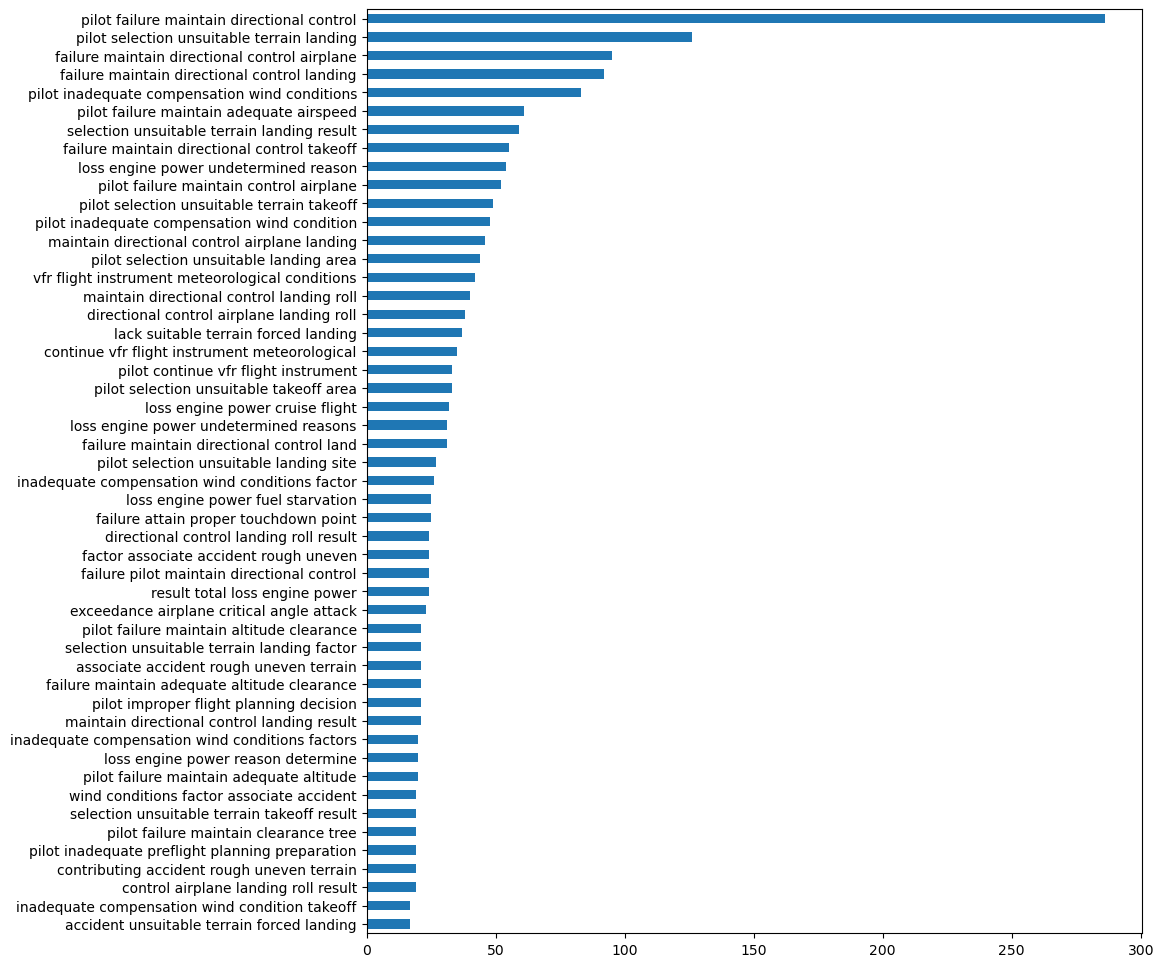

In [72]:
plt.figure(figsize=(10,12))
frequent_ngrams.sort_values(ascending = True).plot.barh()
    